In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


In [3]:
!wget http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-360K.tar.gz

--2023-01-28 18:18:29--  http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-360K.tar.gz
Resolving mtg.upf.edu (mtg.upf.edu)... 84.89.139.55
Connecting to mtg.upf.edu (mtg.upf.edu)|84.89.139.55|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569202935 (543M) [application/octet-stream]
Saving to: ‘lastfm-dataset-360K.tar.gz’

            lastfm-   8%[>                   ]  45.03M   789KB/s    eta 12m 4s ^C


In [ ]:
cols = ['user-mboxsha1', 'musicbrainz-artist-id', 'artist-name', 'plays']
data_artists = pd.read_csv("lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv", sep="\t", names=cols, header=None)
data_artists

,user-mboxsha1,musicbrainz-artist-id,artist-name,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706
...,...,...,...,...
17535650,"sep 20, 2008",7ffd711a-b34d-4739-8aab-25e045c246da,turbostaat,12
17535651,"sep 20, 2008",9201190d-409f-426b-9339-9bd7492443e2,cuba missouri,11
17535652,"sep 20, 2008",e7cf7ff9-ed2f-4315-aca8-bcbd3b2bfa71,little man tate,11
17535653,"sep 20, 2008",f6f2326f-6b25-4170-b89d-e235b25508e8,sigur rós,10


In [ ]:
cols = ['user-mboxsha1', 'gender', 'age', 'country', 'signup']
data_users = pd.read_csv("lastfm-dataset-360K/usersha1-profile.tsv", sep="\t", names=cols, header=None)
data_users

,user-mboxsha1,gender,age,country,signup
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"
...,...,...,...,...,...
359342,fffe7823f67b433b45f22056467db921c1d3d7d0,m,25.0,Germany,"Jun 24, 2006"
359343,fffe8637bd8234309e871409c7ebef99a720afc1,m,25.0,Brazil,"Sep 9, 2007"
359344,fffe8c7f952d9b960a56ed4dcb40a415d924b224,m,20.0,United States,"Aug 8, 2007"
359345,ffff9af9ae04d263dae91cb838b1f3a6725f5ffb,m,20.0,Russian Federation,"Dec 3, 2005"


In [ ]:
df = pd.merge(data_artists, data_users, on='user-mboxsha1')

In [ ]:
df

,user-mboxsha1,musicbrainz-artist-id,artist-name,plays,gender,age,country,signup
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137,f,22.0,Germany,"Feb 1, 2007"
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099,f,22.0,Germany,"Feb 1, 2007"
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897,f,22.0,Germany,"Feb 1, 2007"
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717,f,22.0,Germany,"Feb 1, 2007"
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706,f,22.0,Germany,"Feb 1, 2007"
...,...,...,...,...,...,...,...,...
17535564,ffff9ef87a7d9494ada2f9ade4b9ff637c0759ac,7e482754-d3f6-49e5-b351-235849754e26,tristania,61,m,21.0,Belgium,"Nov 25, 2008"
17535565,ffff9ef87a7d9494ada2f9ade4b9ff637c0759ac,656a0800-3a2b-47ed-a3ff-1e2908fdd2ff,xandria,61,m,21.0,Belgium,"Nov 25, 2008"
17535566,ffff9ef87a7d9494ada2f9ade4b9ff637c0759ac,4d7928cd-7ed2-4282-8c29-c0c9f966f1bd,alice cooper,59,m,21.0,Belgium,"Nov 25, 2008"
17535567,ffff9ef87a7d9494ada2f9ade4b9ff637c0759ac,298909e4-ebcb-47b8-95e9-cc53b087fc65,lamb of god,58,m,21.0,Belgium,"Nov 25, 2008"


<AxesSubplot: xlabel='gender', ylabel='count'>

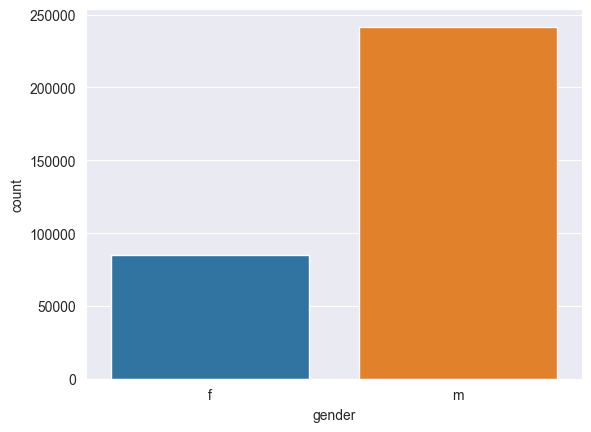

In [ ]:
sns.countplot(x='gender', data=data_users)

In [ ]:
data_users[data_users['age'].isna()]

,user-mboxsha1,gender,age,country,signup
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
9,0001399387da41d557219578fb08b12afa25ab67,m,NaN,Ukraine,"Aug 17, 2008"
12,0001a88a7092846abb1b70dbcced05f914976371,NaN,NaN,Japan,"Oct 13, 2008"
14,000215d3060a5b0ab7b3c415d49ec579100d4c87,f,NaN,Australia,"Jul 26, 2008"
...,...,...,...,...,...
359287,fff508bfea0e1953ecfe4ec6c635fb9e2ee4b0cc,NaN,NaN,Switzerland,"Jul 5, 2007"
359297,fff6c0fff0e0bc03f7b5a3aa8a538dc9d887fa4a,m,NaN,Poland,"Mar 25, 2008"
359304,fff89b6b5332f0f38996f11c88f908a3924926fe,m,NaN,United States,"Jun 6, 2009"
359312,fffa4c6989304128f53a1643c0515277435f81dd,m,NaN,Japan,"Dec 23, 2008"


<AxesSubplot: xlabel='age', ylabel='count'>

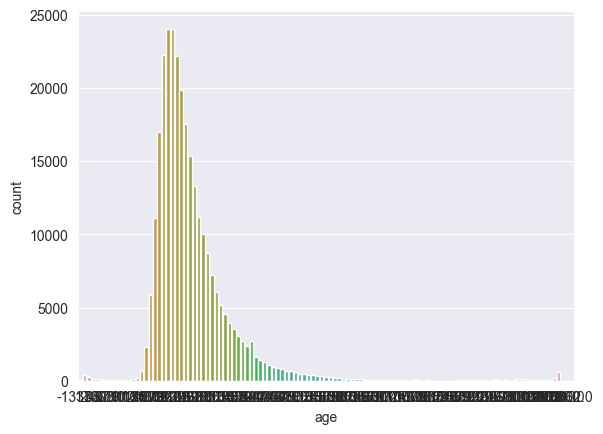

In [ ]:
df['user-mboxsha1'].value_counts()

2040b3d3cb47caace19e728090a88d6b1087aa8e    166
13c0df8a58cd3ca9e37d8e90662d2ad3c062eaa5    166
52bf0682648b44e6cc27ebe512dd4fa3455a11c2    150
7679da839e1a6c2d299c7fd6834fb9bf6e229224    139
8d8643cded0ac18e66a3c5a2b74de21fbca0e6b7    132
                                           ... 
e38523c5c54de0eb62bcad8e2f3fb01f1fa41b7f      1
c1cb4c8a0aa87b8198a4c8ef795e2b7b67ba5933      1
23cce0df9623cd6cbef59ac70a5e4fe541fb21e8      1
64b0bfaf1dd3fd6f4b4ecaa1a98becd15c83b89d      1
0b4688de02bb80f602914deae0b65eac1f311fe0      1
Name: user-mboxsha1, Length: 358866, dtype: int64

In [ ]:
sns.boxplot(x='gender', data=data_users.value_counts())

ValueError: Could not interpret input 'gender'

In [2]:
!pip install implicit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from implicit.datasets.lastfm import get_lastfm
import h5py

artists, users, artist_user_plays = get_lastfm()

/usr/local/lib/python3.8/dist-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [4]:
from implicit.nearest_neighbours import bm25_weight

# weight the matrix, both to reduce impact of users that have played the same artist thousands of times
# and to reduce the weight given to popular items
artist_user_plays = bm25_weight(artist_user_plays, K1=100, B=0.8)

# get the transpose since the most of the functions in implicit expect (user, item) sparse matrices instead of (item, user)
user_plays = artist_user_plays.T.tocsr()

In [5]:
user_plays

<358868x292385 sparse matrix of type '<class 'numpy.float64'>'
	with 17535606 stored elements in Compressed Sparse Row format>

In [7]:
print(user_plays)

  (0, 19370)	352.9751779640889
  (0, 19606)	434.397274202691
  (0, 37529)	305.27620607761054
  (0, 45568)	585.4341693344771
  (0, 45575)	808.3451406668643
  (0, 46258)	142.2391605697496
  (0, 51099)	48.74467472041867
  (0, 90948)	39.97596241359612
  (0, 92187)	113.34032335425246
  (0, 100655)	13.24056433503626
  (0, 103727)	21.558948808986425
  (0, 106705)	28.653924454702246
  (0, 106720)	191.3328220153283
  (0, 125500)	241.32859292780725
  (0, 126706)	19.335073524300682
  (0, 129399)	13.089673010275645
  (0, 137079)	89.54607771892809
  (0, 144255)	4.720524922651388
  (0, 144310)	102.37990343980374
  (0, 151783)	7.391922803698345
  (0, 154701)	9.001361851612097
  (0, 155258)	480.5849215582812
  (0, 165137)	93.71950862504329
  (0, 168001)	53.10572249143597
  (0, 169923)	118.06681082623732
  :	:
  (358867, 160660)	19.37550850128334
  (358867, 161432)	0.6741345116204547
  (358867, 161741)	324.0004173981808
  (358867, 162114)	3.2343995062094835
  (358867, 167160)	37.28155036431806
  (35886

In [8]:
c = user_plays.tocoo()                                                                                        

t_df = pd.DataFrame({'node1': c.row, 'node2': c.col, 'edge_weight': c.data}) 

In [31]:
c.row

array([     0,      0,      0, ..., 358867, 358867, 358867], dtype=int32)

In [28]:
c.col

array([ 19370,  19606,  37529, ..., 268690, 271758, 274818], dtype=int32)

In [10]:
t_df

,node1,node2,edge_weight
0,0,19370,352.975178
1,0,19606,434.397274
2,0,37529,305.276206
3,0,45568,585.434169
4,0,45575,808.345141
...,...,...,...
17535601,358867,265456,14.248710
17535602,358867,267949,4.426008
17535603,358867,268690,11.316823
17535604,358867,271758,11.934420


In [19]:
t_df['node1'].value_counts()

27761     166
45302     166
115708    150
165765    139
198252    132
         ... 
77308       1
227632      1
231065      1
352282      1
125307      1
Name: node1, Length: 358868, dtype: int64

In [24]:
counts = t_df['node1'].value_counts()

res = t_df[~t_df['node1'].isin(counts[counts < 41].index)]

In [26]:
res

,node1,node2,edge_weight
0,0,19370,352.975178
1,0,19606,434.397274
2,0,37529,305.276206
3,0,45568,585.434169
4,0,45575,808.345141
...,...,...,...
17535601,358867,265456,14.248710
17535602,358867,267949,4.426008
17535603,358867,268690,11.316823
17535604,358867,271758,11.934420


In [27]:
list1 = res['node1'].tolist()
list2 = res['node2'].tolist()
list3 = res['edge_weight'].tolist()

In [28]:
c.row = np.array(list1)
c.col = np.array(list2)
c.data = np.array(list3)

In [30]:
import scipy
new_matrix = scipy.sparse.csr_matrix(c)

In [31]:
new_matrix

<358868x292385 sparse matrix of type '<class 'numpy.float64'>'
	with 16431301 stored elements in Compressed Sparse Row format>

In [ ]:
def get_divided_test_fold(df, test_index, sampling_rate=.2):
    test_fold_df = df[df["user-mboxsha1"].isin(test_index)].copy()
    test_df = test_fold_df.groupby('user-mboxsha1').sample(frac=.2)
    # test_fold_df.loc[test_fold_df.matrix_position.isin(test_df.matrix_position), 'rating'] = 0

    return test_fold_df, test_df

In [ ]:
# divide ratings into 5 CV, still question about test data - see paper
# 0th column is 0, since user ids start with 1
from sklearn.model_selection import KFold
from implicit.evaluation import ndcg_at_k
from implicit.evaluation import train_test_split
from implicit.als import AlternatingLeastSquares


kf = KFold(n_splits=5, random_state=12345, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(user_plays)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index.shape}")
    print(f"  Test:  index={test_index.shape}")

    train_data = user_plays[train_index, ].copy()
    test_data = user_plays[test_index,].copy()

    model = AlternatingLeastSquares(factors=50, regularization=0.01)
    model.fit(train_data)

    ndcg = ndcg_at_k(model, train_data, test_data, K=10)
    print(f'ndcg: {ndcg}')

Fold 0:
  Train: index=(287094,)
  Test:  index=(71774,)


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/71774 [00:00<?, ?it/s]

ndcg: 0.009594199246002166
Fold 1:
  Train: index=(287094,)
  Test:  index=(71774,)


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/71774 [00:00<?, ?it/s]

ndcg: 0.009834637855796684
Fold 2:
  Train: index=(287094,)
  Test:  index=(71774,)


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/71774 [00:00<?, ?it/s]

ndcg: 0.010134458577788533
Fold 3:
  Train: index=(287095,)
  Test:  index=(71773,)


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/71773 [00:00<?, ?it/s]

ndcg: 0.009869185845097222
Fold 4:
  Train: index=(287095,)
  Test:  index=(71773,)


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/71773 [00:00<?, ?it/s]

ndcg: 0.009593725520915246


In [ ]:
userid = 12345
ids, scores = model.recommend(userid, user_plays[userid], N=10, filter_already_liked_items=False)

In [ ]:
# Use pandas to display the output in a table, pandas isn't a dependency of implicit otherwise
import numpy as np
import pandas as pd
pd.DataFrame({
    "artist": artists[ids],
    "score": scores,
    "already_liked": np.in1d(ids, user_plays[userid].indices)
})

In [ ]:
# get related items for the beatles (itemid = 25512)
ids, scores= model.similar_items(252512)

# display the results using pandas for nicer formatting
pd.DataFrame({"artist": artists[ids], "score": scores})

In [ ]:
# Make 1000 recommendations for each user in the dataset
userids = np.arange(len(users))
ids, scores = model.recommend(userids, user_plays[userids], N=1000)
ids, ids.shape

In [ ]:
rec_users = data_users[data_users['user-mboxsha1'].isin(users)]
rec_users

In [ ]:
df_id_users = pd.DataFrame(users, columns=['users'])
df_id_users[~df_id_users["users"].isin(rec_users['user-mboxsha1'])]

In [ ]:
users_clean = np.delete(users, [312192, 358867])
scores_clean = np.delete(scores, [312192, 358867], axis=0)
ids_clean = np.delete(ids, [312192, 358867], axis=0)
scores_clean.shape, users_clean.shape, ids_clean.shape

In [ ]:
users_clean

In [ ]:
# from numpy import savetxt
#
# savetxt('data_ids.csv', ids_clean, delimiter=' ')
# savetxt('data_scores.csv', scores_clean, delimiter=' ')
# savetxt('data_users.csv', users_clean, delimiter=' ')
# rec_users.to_csv('users_data.csv')

In [ ]:
# from numpy import loadtxt
# data_ids = loadtxt('data_ids.csv', delimiter=' ', dtype='int32')
# data_scores = loadtxt('data_scores.csv', delimiter=' ', dtype='int32')


In [ ]:
rec_users

Age groups

In [ ]:
data_users.age.unique()

array([ 2.200e+01,        nan,  1.900e+01,  2.800e+01,  2.000e+01,
        1.700e+01,  2.400e+01,  2.700e+01,  2.300e+01,  1.800e+01,
        3.000e+01,  2.600e+01,  1.400e+01,  3.400e+01,  3.100e+01,
        2.100e+01,  3.200e+01,  1.600e+01,  4.700e+01,  2.900e+01,
        5.400e+01,  3.300e+01,  5.700e+01,  3.600e+01,  2.500e+01,
        4.500e+01,  1.500e+01,  3.800e+01,  4.300e+01,  4.100e+01,
        3.900e+01,  3.500e+01,  2.000e+00,  4.000e+01,  3.700e+01,
        5.000e+01,  4.400e+01, -1.337e+03,  4.200e+01,  1.100e+01,
        5.900e+01,  6.000e+01,  1.000e+02,  8.000e+00,  4.600e+01,
        4.800e+01,  1.300e+01,  5.100e+01,  3.000e+00,  1.000e+00,
        6.200e+01,  1.010e+02,  6.000e+00,  4.900e+01,  5.600e+01,
        1.090e+02,  7.000e+01,  5.200e+01,  6.100e+01,  1.080e+02,
        9.000e+00,  5.000e+00,  5.300e+01,  9.900e+01,  5.800e+01,
        1.070e+02,  7.700e+01,  5.500e+01,  1.000e+01,  6.500e+01,
        8.800e+01,  7.800e+01,  6.300e+01,  6.700e+01,  6.900e

In [ ]:
def age_group(rec_users, min_age, max_age):
    return rec_users.iloc[np.where((rec_users['age'] >= min_age) & (rec_users['age'] <= max_age))]

In [ ]:
age_bins = {}
age_bins['1'] = '1-17'
age_bins['18'] = '18-24'
age_bins['25'] = '25-34'
age_bins['35'] = '35-44'
age_bins['45'] = '45-49'
age_bins['50'] = '50-55'
age_bins['56'] = '56+'
age_bins['NaN'] = 'NaN'

age_labels = list(age_bins.values())

In [ ]:
data_users

,user-mboxsha1,gender,age,country,signup
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"
...,...,...,...,...,...
359342,fffe7823f67b433b45f22056467db921c1d3d7d0,m,25.0,Germany,"Jun 24, 2006"
359343,fffe8637bd8234309e871409c7ebef99a720afc1,m,25.0,Brazil,"Sep 9, 2007"
359344,fffe8c7f952d9b960a56ed4dcb40a415d924b224,m,20.0,United States,"Aug 8, 2007"
359345,ffff9af9ae04d263dae91cb838b1f3a6725f5ffb,m,20.0,Russian Federation,"Dec 3, 2005"


In [ ]:
plot_data = data_users.copy()
bins = [0, 18, 25, 35, 45, 50, 56, np.inf, 'NaN']
names = ['1', '18','25', '35', '45', '50','55+', 'NaN']

plot_data['AgeRange'] = pd.cut(plot_data['age'], bins, labels=names)
plot_data["AgeRange"] = plot_data["AgeRange"].fillna('NaN')
plot_data["gender"] = plot_data["gender"].fillna('NaN')

plot_data

,user-mboxsha1,gender,age,country,signup,AgeRange
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",18
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007",NaN
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006",NaN
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008",18
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006",25
...,...,...,...,...,...,...
359342,fffe7823f67b433b45f22056467db921c1d3d7d0,m,25.0,Germany,"Jun 24, 2006",25
359343,fffe8637bd8234309e871409c7ebef99a720afc1,m,25.0,Brazil,"Sep 9, 2007",25
359344,fffe8c7f952d9b960a56ed4dcb40a415d924b224,m,20.0,United States,"Aug 8, 2007",18
359345,ffff9af9ae04d263dae91cb838b1f3a6725f5ffb,m,20.0,Russian Federation,"Dec 3, 2005",18


<AxesSubplot: title={'center': 'Distribution of users per gender'}, xlabel='gender', ylabel='count'>

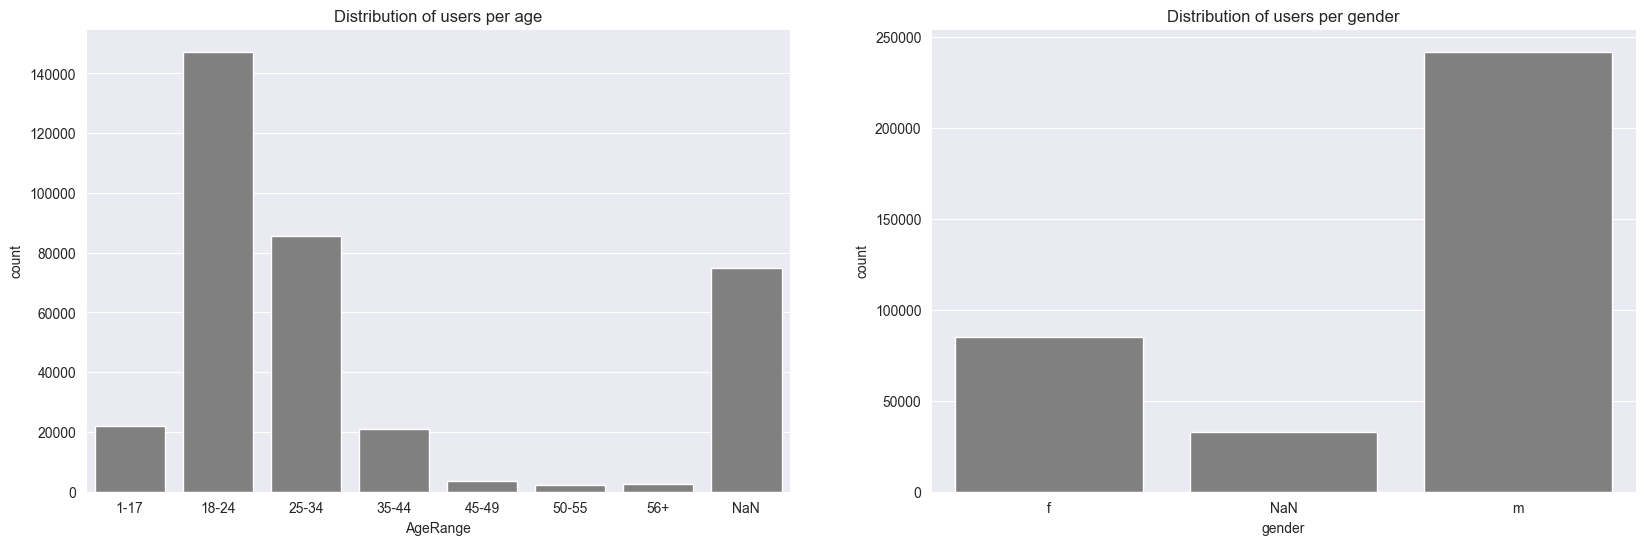

In [ ]:
from matplotlib import pyplot as plt

_, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.despine()

ax[0].set_title('Distribution of users per age')
sns.countplot(data=plot_data, x='AgeRange', color='grey', ax=ax[0])
ax[0].set_xticks(list(range(0, len(age_bins))), labels=age_labels)

ax[1].set_title('Distribution of users per gender')
sns.countplot(data=plot_data, x='gender', color='grey', ax=ax[1])

In [ ]:
for age in age_bins.keys():
    print(f'{age_bins[age]} bin')
    users_curr_age = plot_data[plot_data["AgeRange"] == age]
    # ratings_curr_age = plot_data[:, age]

    print('ratings shape: ', users_curr_age.shape)

1-17 bin
ratings shape:  (21971, 6)
18-24 bin
ratings shape:  (147262, 6)
25-34 bin
ratings shape:  (85741, 6)
35-44 bin
ratings shape:  (20852, 6)
45-49 bin
ratings shape:  (3631, 6)
50-55 bin
ratings shape:  (2365, 6)
56+ bin
ratings shape:  (0, 6)
NaN bin
ratings shape:  (74957, 6)


<AxesSubplot: xlabel='age', ylabel='count'>

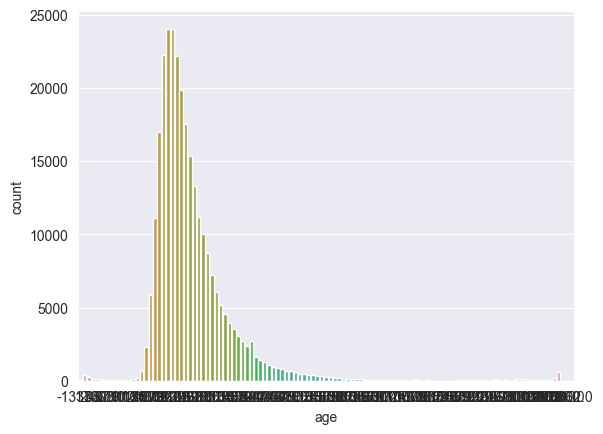

In [ ]:
age_plot = pd.concat([data_users[data_users['age'].isna()], data_users[~data_users['age'].isna()]])
sns.countplot(x='age', data=age_plot)

In [ ]:
def age_group(rec_users, min_age, max_age):
    return rec_users.iloc[np.where((rec_users['age'] >= min_age) & (rec_users['age'] <= max_age))]

In [ ]:
age_group(data_users, 3, 16)

,user-mboxsha1,gender,age,country,signup
24,0003848c96fb95f8d349c00de9f1760fe2777946,m,14.0,Finland,"Jan 15, 2008"
39,0006f849044a98f8db4ac7f83e2881de499b68db,m,16.0,South Africa,"Dec 6, 2008"
102,00113f7cbb77890bf766e921f0e62f1fdc4941c7,m,15.0,Spain,"Oct 19, 2008"
120,0013a259def94304f92096c51d8a087ce0c0ab77,m,16.0,United States,"Dec 24, 2007"
146,00180a9f260ab089a3b21be421e3ad6fbf7a8bd5,m,14.0,Germany,"Mar 13, 2008"
...,...,...,...,...,...
359169,ffddcbdde0004303836f30740d6d38238205a50d,m,16.0,Germany,"May 16, 2009"
359173,ffde52bcac7d962ef5a99c627605702aba8b84a0,m,16.0,Germany,"Sep 23, 2008"
359257,ffed7df8b37e4a97c4d245b2ac5926d9f089d327,m,15.0,United States,"Jul 14, 2008"
359282,fff421174f5aea458281f79c96f2334c0019161f,f,13.0,Kazakhstan,"Jun 5, 2009"


Gender binning

In [ ]:
rec_users.iloc[np.where(rec_users['gender'] == 'm')]

In [ ]:
rec_users.iloc[np.where(rec_users['gender'] == 'f')]

In [ ]:
rec_users.iloc[np.where((rec_users['gender'] != 'm') & (rec_users['gender'] != 'f'))]

array([ 2.200e+01,        nan,  1.900e+01,  2.800e+01,  2.000e+01,
        1.700e+01,  2.400e+01,  2.700e+01,  2.300e+01,  1.800e+01,
        3.000e+01,  2.600e+01,  1.400e+01,  3.400e+01,  3.100e+01,
        2.100e+01,  3.200e+01,  1.600e+01,  4.700e+01,  2.900e+01,
        5.400e+01,  3.300e+01,  5.700e+01,  3.600e+01,  2.500e+01,
        4.500e+01,  1.500e+01,  3.800e+01,  4.300e+01,  4.100e+01,
        3.900e+01,  3.500e+01,  2.000e+00,  4.000e+01,  3.700e+01,
        5.000e+01,  4.400e+01, -1.337e+03,  4.200e+01,  1.100e+01,
        5.900e+01,  6.000e+01,  1.000e+02,  8.000e+00,  4.600e+01,
        4.800e+01,  1.300e+01,  5.100e+01,  3.000e+00,  1.000e+00,
        6.200e+01,  1.010e+02,  6.000e+00,  4.900e+01,  5.600e+01,
        1.090e+02,  7.000e+01,  5.200e+01,  6.100e+01,  1.080e+02,
        9.000e+00,  5.000e+00,  5.300e+01,  9.900e+01,  5.800e+01,
        1.070e+02,  7.700e+01,  5.500e+01,  1.000e+01,  6.500e+01,
        8.800e+01,  7.800e+01,  6.300e+01,  6.700e+01,  6.900e